In [1]:
import matplotlib.pyplot as plt

# Data
precision = {
    1: 0.15033112582781458,
    5: 0.11105960264900662,
    10: 0.10395695364238412,
    15: 0.10562913907284768,
    20: 0.10100993377483444,
    25: 0.09577483443708609,
    40: 0.08688741721854304,
    50: 0.08455960264900664
}

ncdg = {
    1: 0.15033112582781458,
    5: 0.11751915451471905,
    10: 0.10714419137650094,
    15: 0.10667343187422693,
    20: 0.1031976903034765,
    25: 0.09975304311552119,
    40: 0.09582025169542635,
    50: 0.09642340042377161
}

recall = {
    1: 0.0023986459642478097,
    5: 0.008859112443857658,
    10: 0.017141557661585087,
    15: 0.025418962488945873,
    20: 0.032558052616898356,
    25: 0.03845672056319297,
    40: 0.055988397177233314,
    50: 0.0669302729963809
}




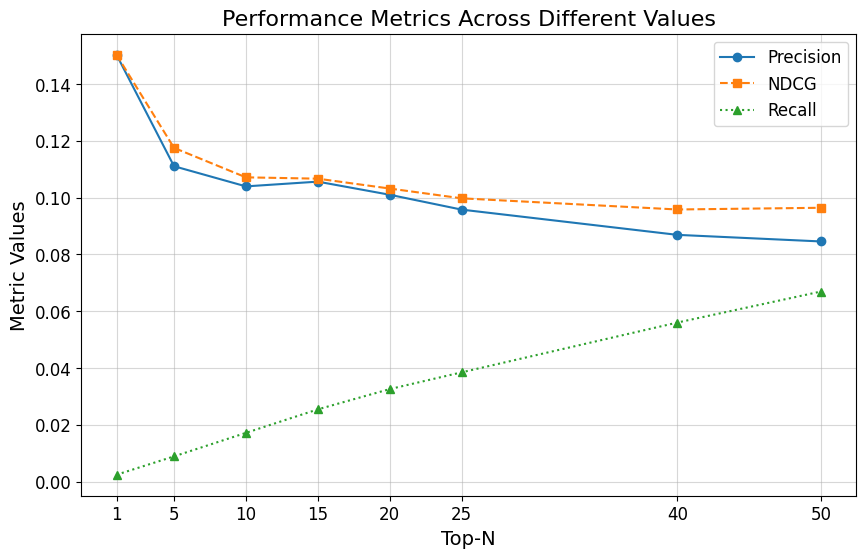

In [2]:

plt.figure(figsize=(10, 6))

plt.plot(precision.keys(), precision.values(), marker='o', label='Precision', linestyle='-')
plt.plot(ncdg.keys(), ncdg.values(), marker='s', label='NDCG', linestyle='--')
plt.plot(recall.keys(), recall.values(), marker='^', label='Recall', linestyle=':')

# Labels and Title
plt.title('Performance Metrics Across Different Values', fontsize=16)
plt.xlabel('Top-N', fontsize=14)
plt.ylabel('Metric Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(list(precision.keys()), fontsize=12)
plt.yticks(fontsize=12)

plt.show()